In [103]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

# Generate Data

In [341]:
# Generate Male Height (absolute value since data might be negative)
male_h = abs(np.random.normal(200, 25, 50)) # mu=150, sigma=30, size=50
# Generate Male Weight
male_w = abs(np.random.normal(200, 10, 50))
# Generate Female Height
female_h = abs(np.random.normal(100, 45, 50))
# Generate Female Weight
female_w = abs(np.random.normal(180, 20, 50))

In [342]:
# Merge all data into one matrix
male_data = np.concatenate((male_h.reshape(-1,1),
                            male_w.reshape(-1,1),
                            np.full(50,1).reshape(-1,1)), axis=1)
female_data = np.concatenate((female_h.reshape(-1,1),
                            female_w.reshape(-1,1),
                            np.full(50,0).reshape(-1,1)), axis=1)
# Gender is coded as 1=Male and 0=Female
data = np.concatenate((male_data, female_data), axis=0)

In [343]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

Text(0, 0.5, 'Weight(kg)')

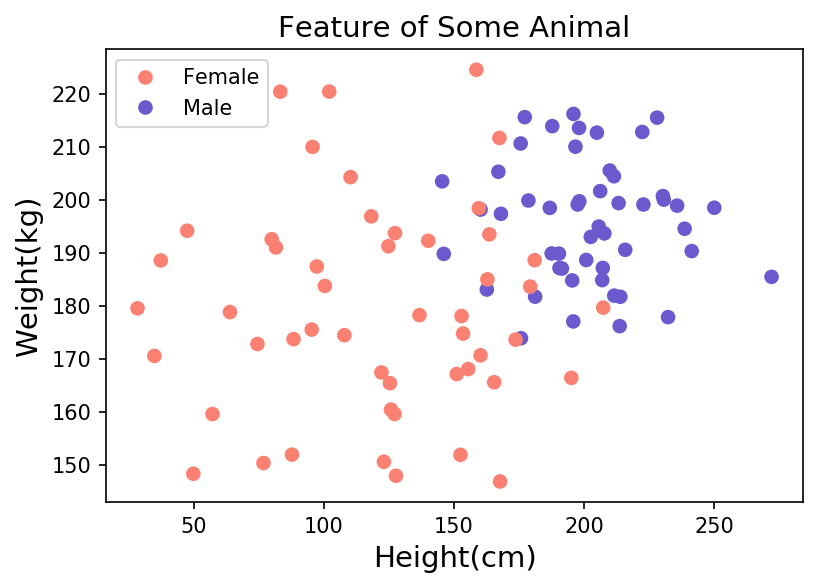

In [344]:
obj = plt.scatter(data[:,0],data[:,1],c=data[:,2],
                  cmap=ListedColormap(['salmon','slateblue']))
plt.legend(handles=obj.legend_elements()[0], labels=['Female','Male'])
plt.title('Feature of Some Animal',fontsize=14)
plt.xlabel('Height(cm)',fontsize=14)
plt.ylabel('Weight(kg)',fontsize=14)

# Calculate Probability
* We assume that the data is normal distribution to fit our naive bayes

In [345]:
# Calculate the Gaussian probability distribution function for x
# Code from https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
def normal_dist_prob(x, mean, stdev):
    exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * np.pi) * stdev)) * exponent

* Let's say we have a new data point.
* We want to know if it is a male or a female.

In [346]:
new_animal = [200, 140] # Height = 200 cm, Weight = 140 kg

* Use Bayesian Equation: 
    * $P(male | weight=140,height=200)= 
    \frac{P(Weight=140, Height=200 | male)}{P(Weight=140, Height=200)}$
    * $P(female | weight=140,height=200)=
    \frac{P(Weight=140, Height=200 | female)}{P(Weight=140, Height=200)}$
* We ignore the denominators above. We only need the ratio of probabilities, and both male/female probability have same denominator.
* To see what I actually mean, just follow next steps carefully.

* Let's first calculate probability of this creature being male, P(male|weight=140,height=200)
* As I said, we ignore the denominator so we only calculate: 
    * $P(Weight=140, Height=200 | male)=P(Weight=140|male)*P(Height=200|male)*P(male)$

In [347]:
# Given male means from our male data.
# Pull up only the male data.
male_data = data[data[:,2]==1]

# Obtain the mean and standard deviation for weight and height 
male_height_mean = np.mean(male_data[:,0])
male_height_std = np.std(male_data[:,0])
male_weight_mean = np.mean(male_data[:,1])
male_weight_std = np.std(male_data[:,1])

# Calculate P(w=140,h=200|male)
prob_given_male = normal_dist_prob(140, male_weight_mean, male_weight_std)* \
normal_dist_prob(200, male_height_mean, male_height_std) * 0.5
print(prob_given_male)

1.4320424412893118e-09


In [348]:
# Do the same for female data
female_data = data[data[:,2]==0]

female_height_mean = np.mean(female_data[:,0])
female_height_std = np.std(female_data[:,0])
female_weight_mean = np.mean(female_data[:,1])
female_weight_std = np.std(female_data[:,1])

prob_given_female = normal_dist_prob(140, female_weight_mean, female_weight_std)* \
normal_dist_prob(200, female_height_mean, female_height_std) * 0.5
print(prob_given_female)

2.360935653726289e-06


In [349]:
# Make the ratio into actual probability
final_prob_male = prob_given_male/(prob_given_male+prob_given_female)
final_prob_female = 1 - final_prob_male
print(final_prob_male, final_prob_female)

0.0006061894782986092 0.9993938105217014


* The probability that the new point is female is 99.99%

# Make it as a Function

In [350]:
def guess_a_point(height, weight):
    # Get Male Data
    male_data = data[data[:,2]==1]

    male_height_mean = np.mean(male_data[:,0])
    male_height_std = np.std(male_data[:,0])
    male_weight_mean = np.mean(male_data[:,1])
    male_weight_std = np.std(male_data[:,1])

    prob_given_male = normal_dist_prob(weight, male_weight_mean, male_weight_std)* \
    normal_dist_prob(height, male_height_mean, male_height_std) * 0.5

    # Get Female Data
    female_data = data[data[:,2]==0]

    female_height_mean = np.mean(female_data[:,0])
    female_height_std = np.std(female_data[:,0])
    female_weight_mean = np.mean(female_data[:,1])
    female_weight_std = np.std(female_data[:,1])

    prob_given_female = normal_dist_prob(weight, female_weight_mean, female_weight_std)* \
    normal_dist_prob(height, female_height_mean, female_height_std) * 0.5

    final_prob_male = prob_given_male/(prob_given_male+prob_given_female)
    final_prob_female = 1 - final_prob_male
    
    return final_prob_male, final_prob_female
    

In [351]:
# Let's guess a new point!
guess_a_point(180,200)

(0.8958731022668118, 0.10412689773318817)

# Visualize for all points

In [352]:
gen_height = np.linspace(0,250,100)
gen_weight = np.linspace(0,250,100)

In [353]:
result = []
coords = []
for i in gen_height:
    for j in gen_weight:
        result.append(guess_a_point(i,j))
        coords.append([i,j])
result = np.array(result)
coords = np.array(coords)
print(result)
print(coords)

[[1.24559277e-58 1.00000000e+00]
 [1.73326836e-57 1.00000000e+00]
 [2.33427663e-56 1.00000000e+00]
 ...
 [4.98343477e-01 5.01656523e-01]
 [3.66806141e-01 6.33193859e-01]
 [2.46389082e-01 7.53610918e-01]]
[[  0.           0.        ]
 [  0.           2.52525253]
 [  0.           5.05050505]
 ...
 [250.         244.94949495]
 [250.         247.47474747]
 [250.         250.        ]]


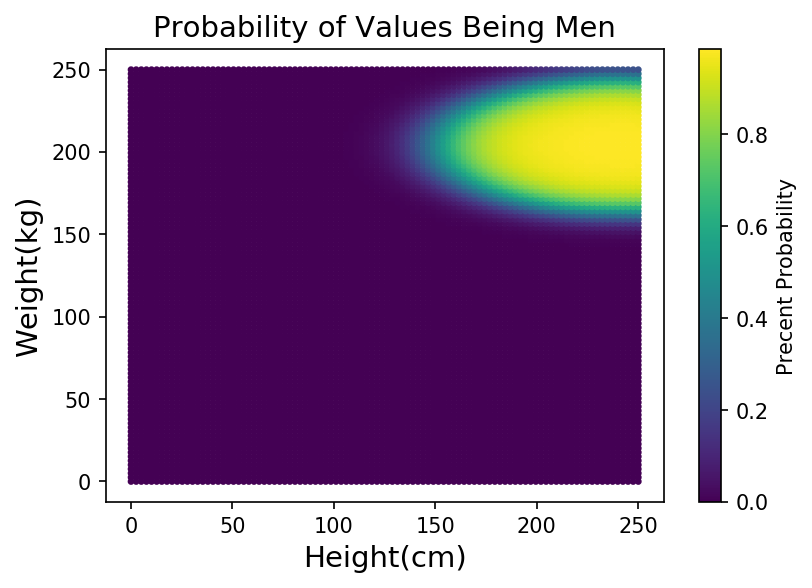

In [354]:
plt.scatter(coords[:,0],coords[:,1],c=result[:,0],s=5)
plt.xlabel('Height(cm)',fontsize=14)
plt.ylabel('Weight(kg)',fontsize=14)
plt.title('Probability of Values Being Men',fontsize=14)
plt.colorbar().set_label('Precent Probability')

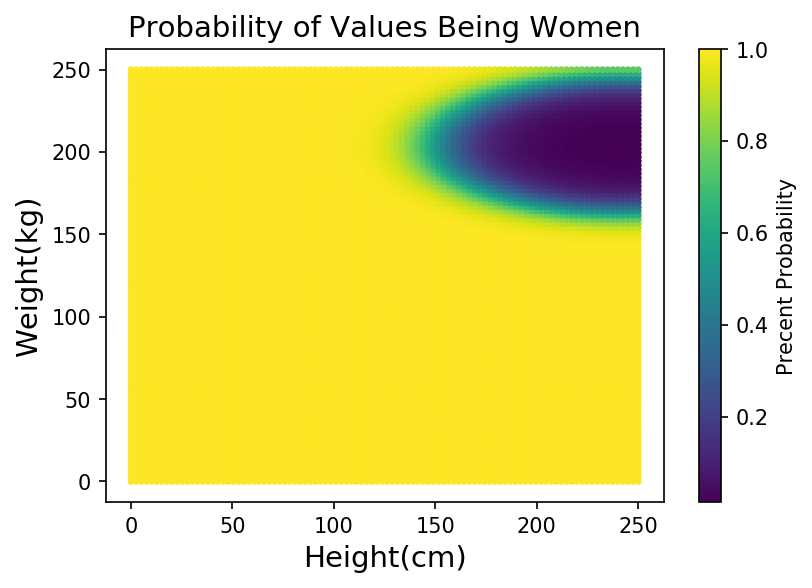

In [355]:
plt.scatter(coords[:,0],coords[:,1],c=result[:,1],s=5)
plt.xlabel('Height(cm)',fontsize=14)
plt.ylabel('Weight(kg)',fontsize=14)
plt.title('Probability of Values Being Women',fontsize=14)
plt.colorbar().set_label('Precent Probability')

# Let's make our data more confusing!

In [364]:
# Generate Male Height (absolute value since data might be negative)
male_h = abs(np.random.normal(200, 25, 50)) # mu=150, sigma=30, size=50
# Generate Male Weight
male_w = abs(np.random.normal(200, 25, 50))
# Generate Female Height
female_h = abs(np.random.normal(200, 25, 50))
# Generate Female Weight
female_w = abs(np.random.normal(200, 25, 50))

In [365]:
# Merge all data into one matrix
male_data = np.concatenate((male_h.reshape(-1,1),
                            male_w.reshape(-1,1),
                            np.full(50,1).reshape(-1,1)), axis=1)
female_data = np.concatenate((female_h.reshape(-1,1),
                            female_w.reshape(-1,1),
                            np.full(50,0).reshape(-1,1)), axis=1)
# Gender is coded as 1=Male and 0=Female
data = np.concatenate((male_data, female_data), axis=0)

In [366]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

Text(0, 0.5, 'Weight(kg)')

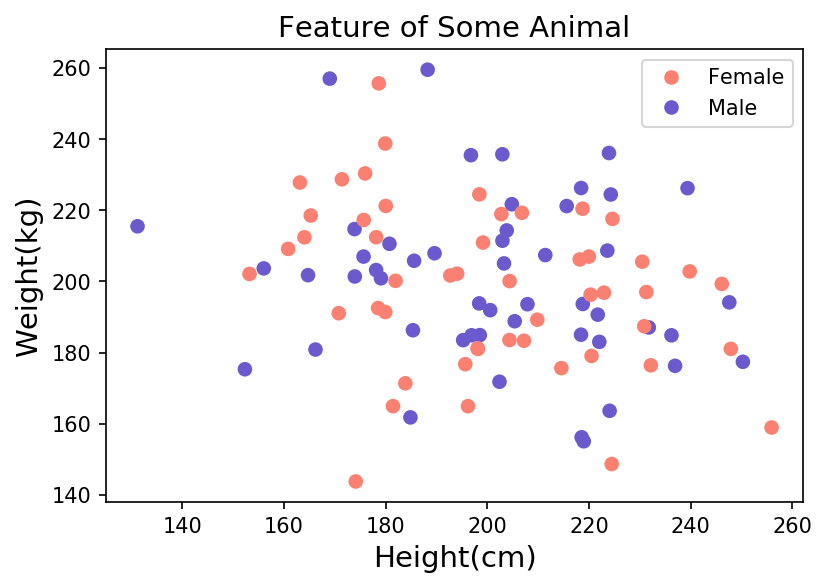

In [367]:
obj = plt.scatter(data[:,0],data[:,1],c=data[:,2],
                  cmap=ListedColormap(['salmon','slateblue']))
plt.legend(handles=obj.legend_elements()[0], labels=['Female','Male'])
plt.title('Feature of Some Animal',fontsize=14)
plt.xlabel('Height(cm)',fontsize=14)
plt.ylabel('Weight(kg)',fontsize=14)

In [368]:
gen_height = np.linspace(0,250,100)
gen_weight = np.linspace(0,250,100)

In [369]:
result = []
coords = []
for i in gen_height:
    for j in gen_weight:
        result.append(guess_a_point(i,j))
        coords.append([i,j])
result = np.array(result)
coords = np.array(coords)
print(result)
print(coords)

[[0.54595392 0.45404608]
 [0.54117462 0.45882538]
 [0.5364745  0.4635255 ]
 ...
 [0.56834508 0.43165492]
 [0.57191814 0.42808186]
 [0.57556895 0.42443105]]
[[  0.           0.        ]
 [  0.           2.52525253]
 [  0.           5.05050505]
 ...
 [250.         244.94949495]
 [250.         247.47474747]
 [250.         250.        ]]


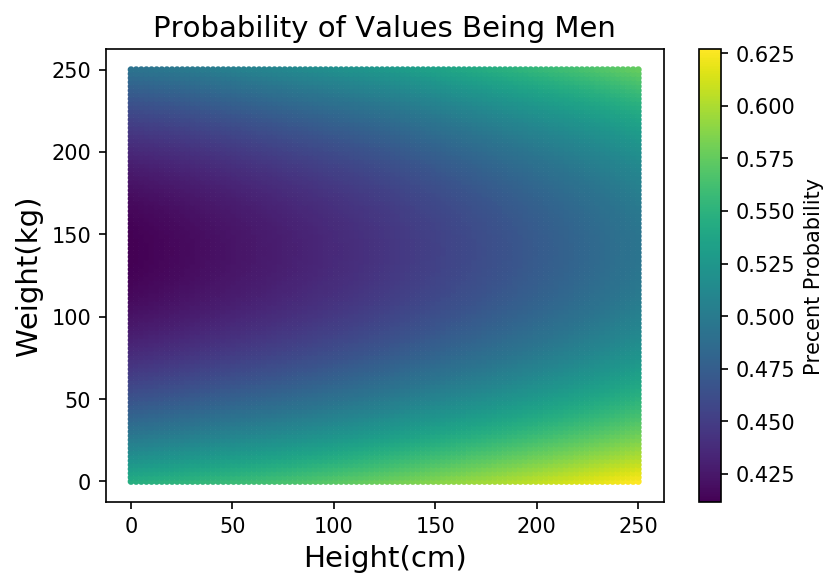

In [370]:
plt.scatter(coords[:,0],coords[:,1],c=result[:,0],s=5)
plt.xlabel('Height(cm)',fontsize=14)
plt.ylabel('Weight(kg)',fontsize=14)
plt.title('Probability of Values Being Men',fontsize=14)
plt.colorbar().set_label('Precent Probability')

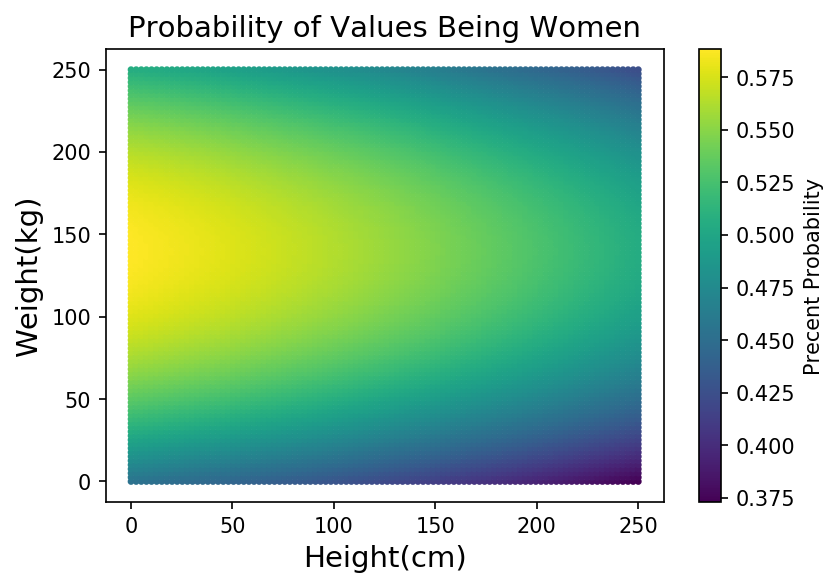

In [371]:
plt.scatter(coords[:,0],coords[:,1],c=result[:,1],s=5)
plt.xlabel('Height(cm)',fontsize=14)
plt.ylabel('Weight(kg)',fontsize=14)
plt.title('Probability of Values Being Women',fontsize=14)
plt.colorbar().set_label('Precent Probability')